In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-darkgrid")

In [2]:
raw = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [3]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [5]:
answer = raw.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [6]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


In [7]:
Q1 = answer['Q1'].value_counts().sort_index()
Q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Text(0.5, 1.0, 'What is your age (# years)?')

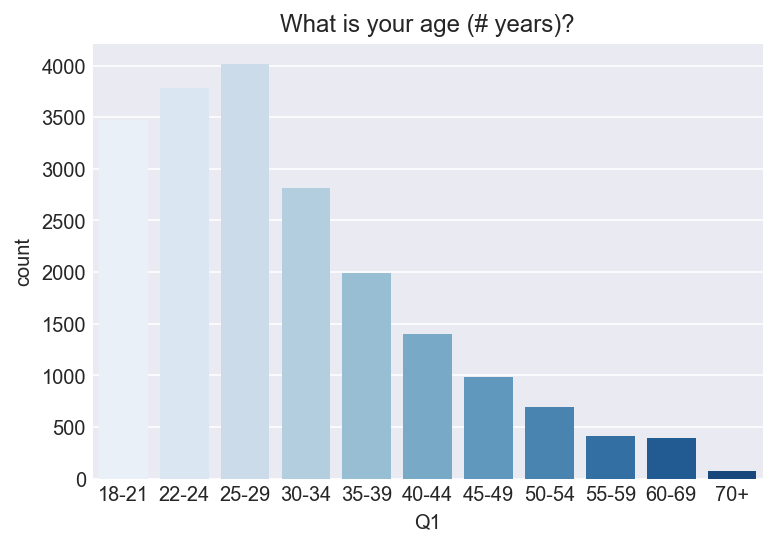

In [8]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1", palette="Blues").set_title(question["Q1"])

In [9]:
question_no = "Q2"
question[question_no]

'What is your gender? - Selected Choice'

In [10]:
Q1 = answer['Q2'].value_counts().sort_index()
Q1

Man                        15789
Nonbinary                     52
Prefer not to say            263
Prefer to self-describe       54
Woman                       3878
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

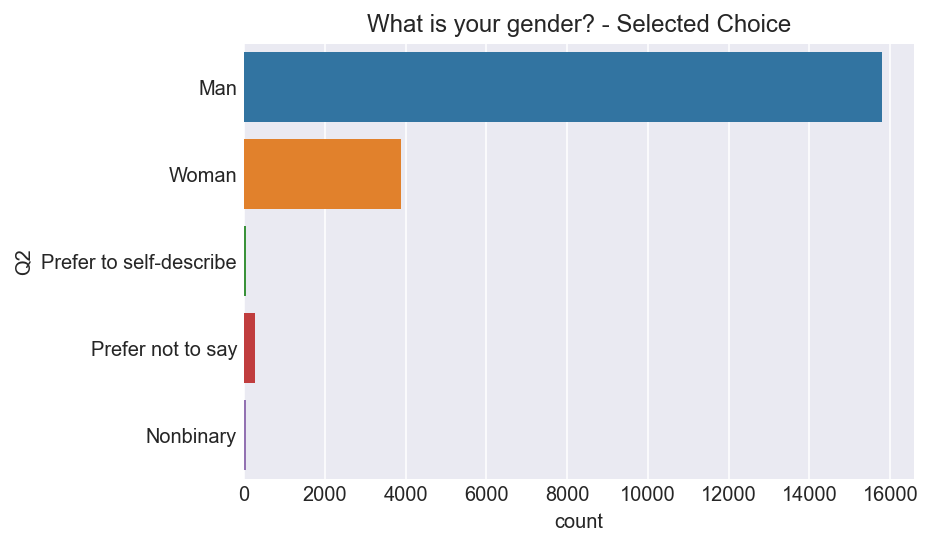

In [11]:
question_no = "Q2"
sns.countplot(data=answer, 
              y=question_no).set_title(question[question_no])

In [12]:
question_no = "Q3"
question[question_no]

'In which country do you currently reside?'

Text(0.5, 1.0, 'In which country do you currently reside?')

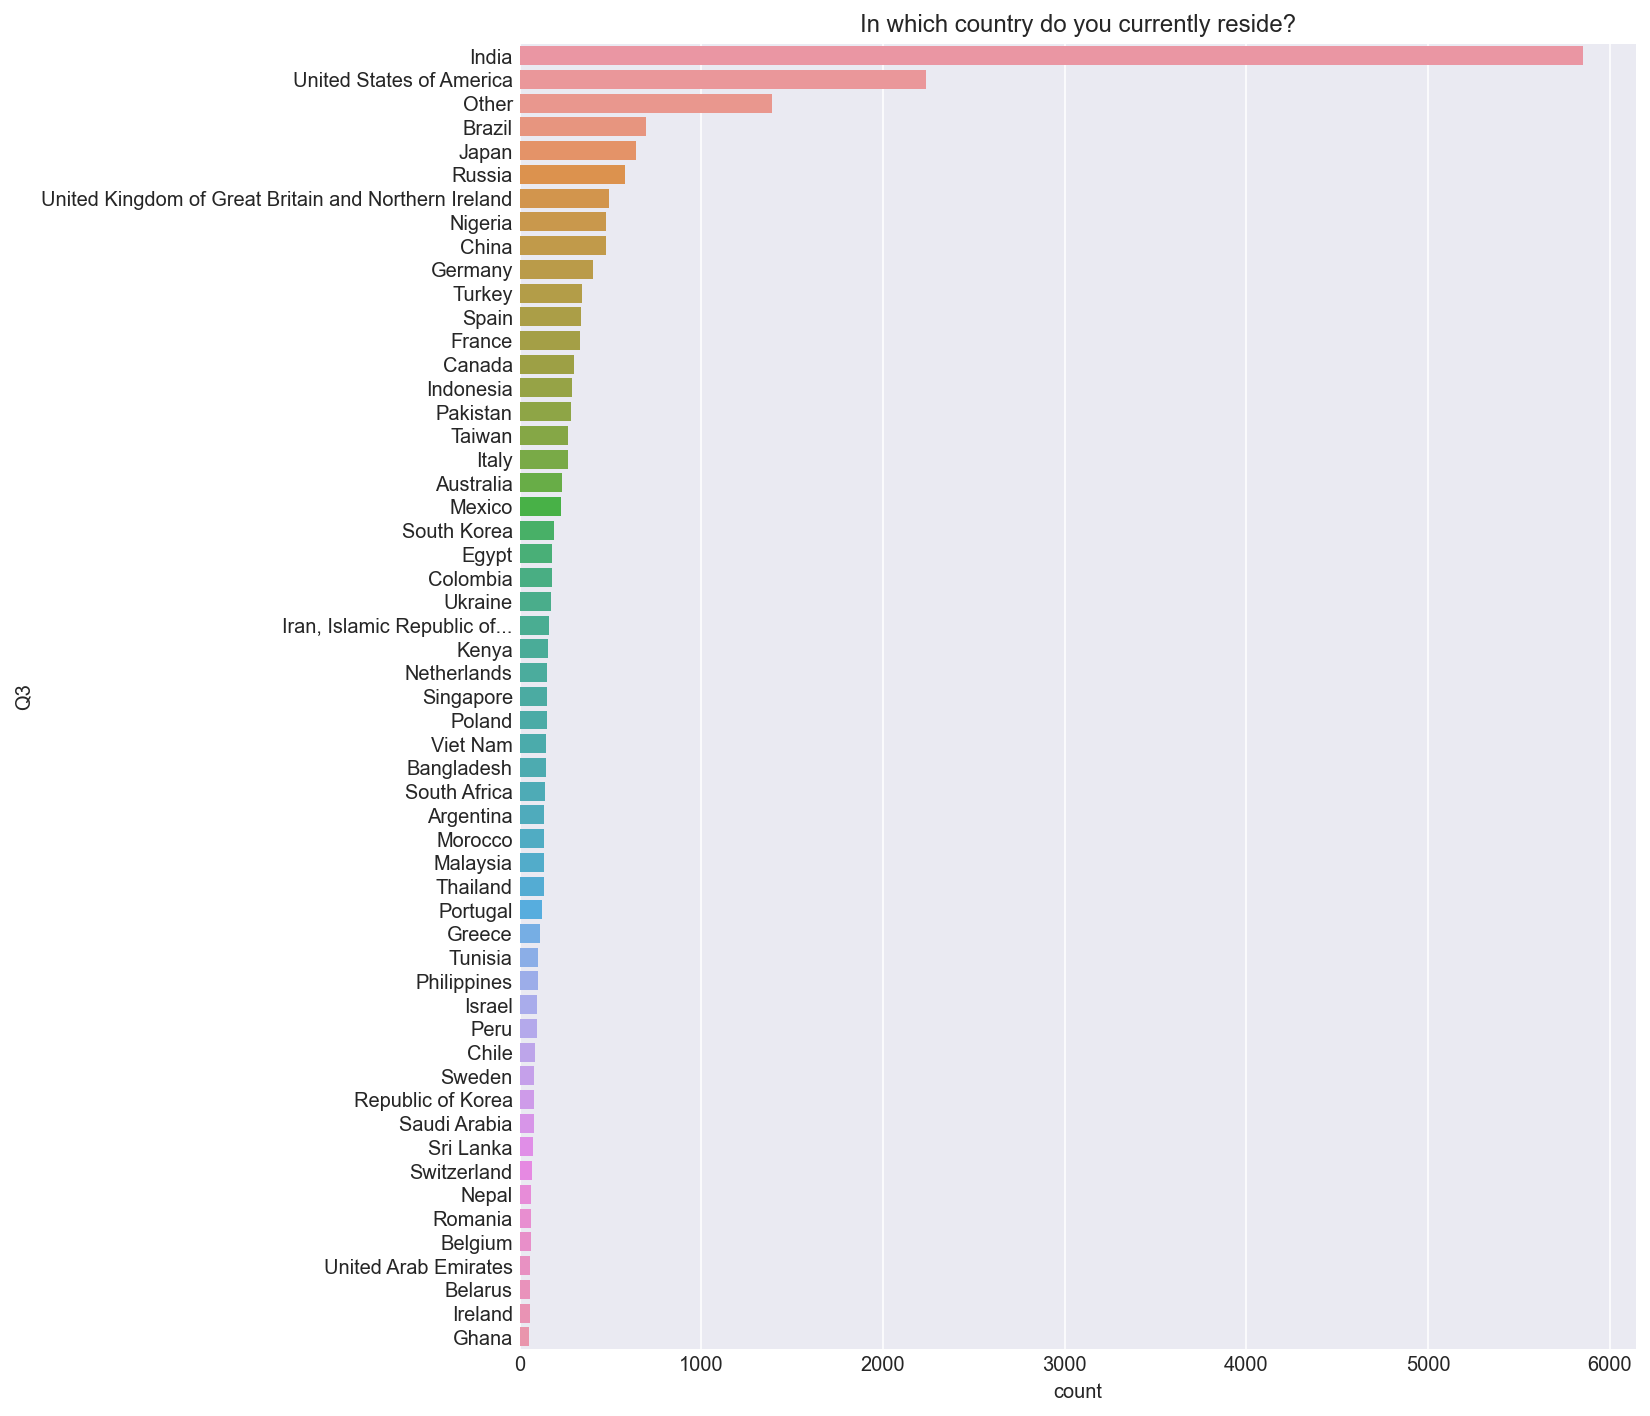

In [13]:
plt.figure(figsize=(10, 12))
sns.countplot(data=answer, 
              y=question_no,
              order=answer[question_no].value_counts().index
             ).set_title(question[question_no])

In [14]:
question_no = "Q4"
question[question_no]

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

Text(0.5, 1.0, 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')

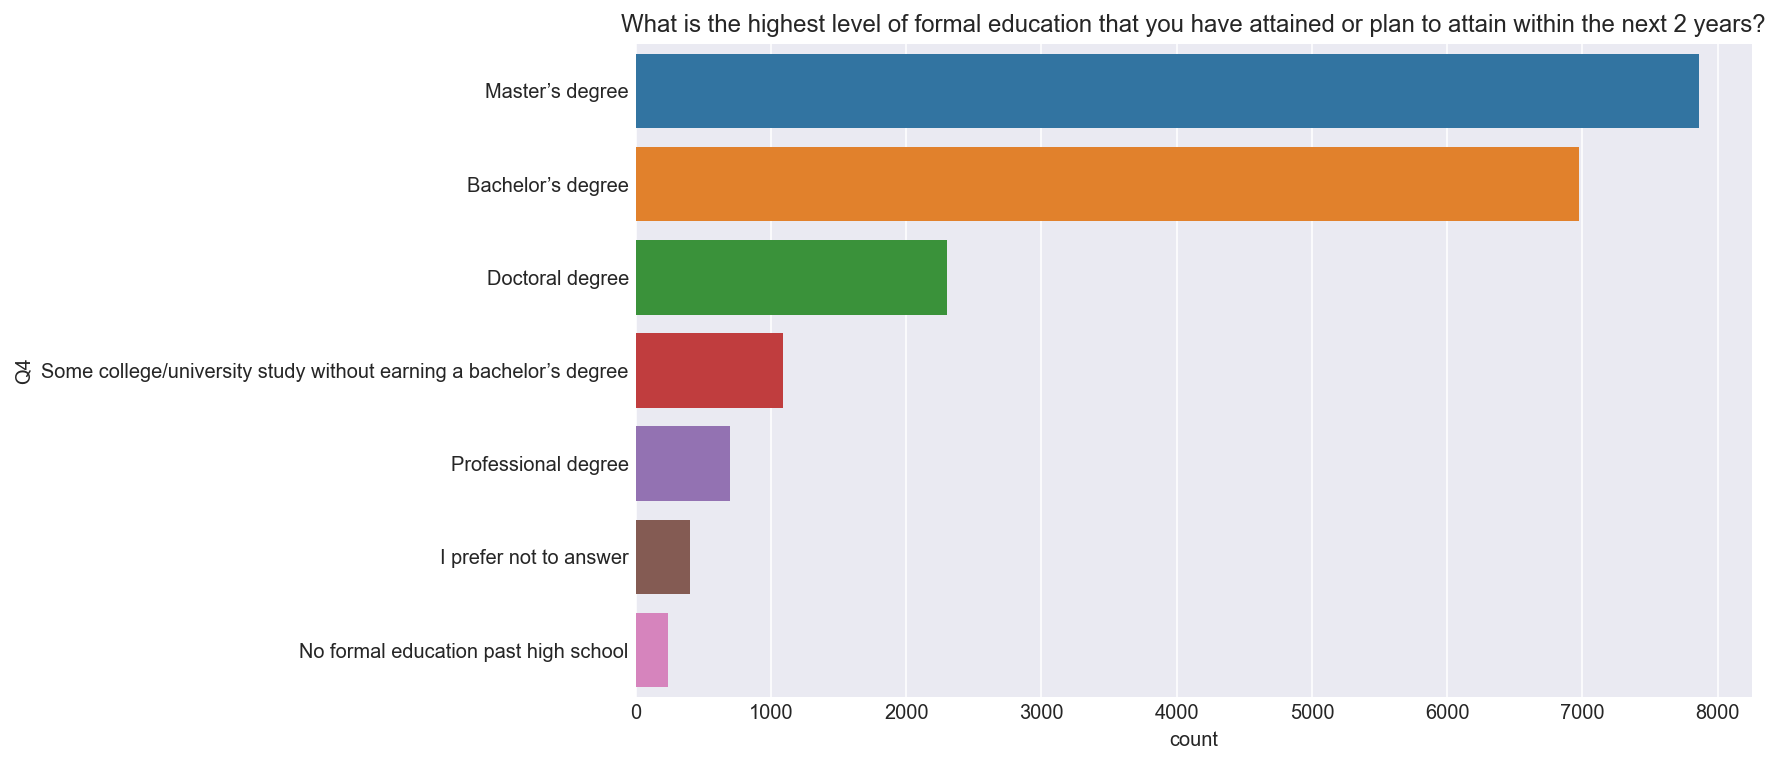

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer, 
              y=question_no,
              order=answer[question_no].value_counts().index
             ).set_title(question[question_no])

In [16]:
question_no = "Q5"
question[question_no]

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

Text(0.5, 1.0, 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')

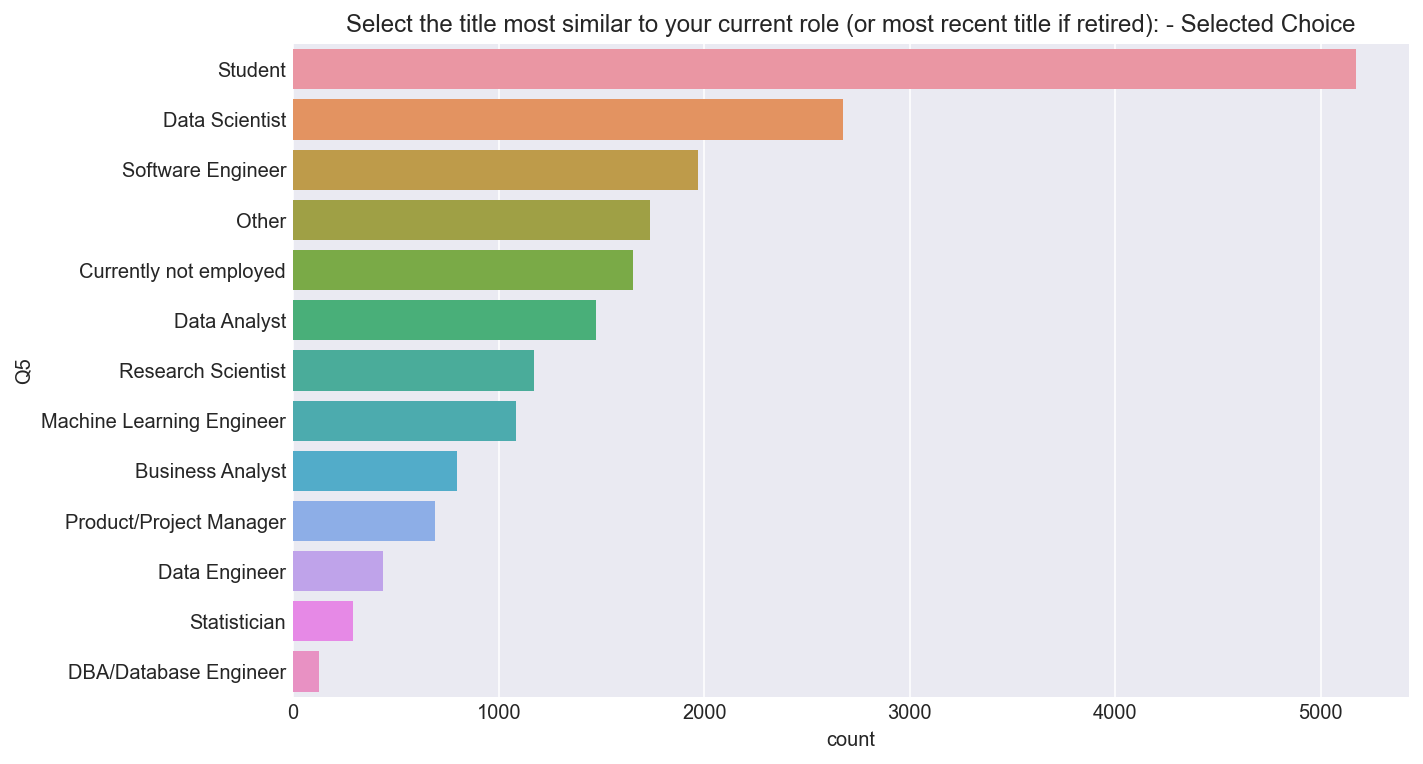

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer, 
              y=question_no,
              order=answer[question_no].value_counts().index
             ).set_title(question[question_no])

In [18]:
question_no = "Q6"
question[question_no]

'For how many years have you been writing code and/or programming?'

In [19]:
answer[question_no].unique()

array(['5-10 years', '10-20 years', '3-5 years', '< 1 years', '1-2 years',
       '20+ years', 'I have never written code', nan], dtype=object)

In [20]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years',  
       '10-20 years', '20+ years']

Text(0.5, 1.0, 'For how many years have you been writing code and/or programming?')

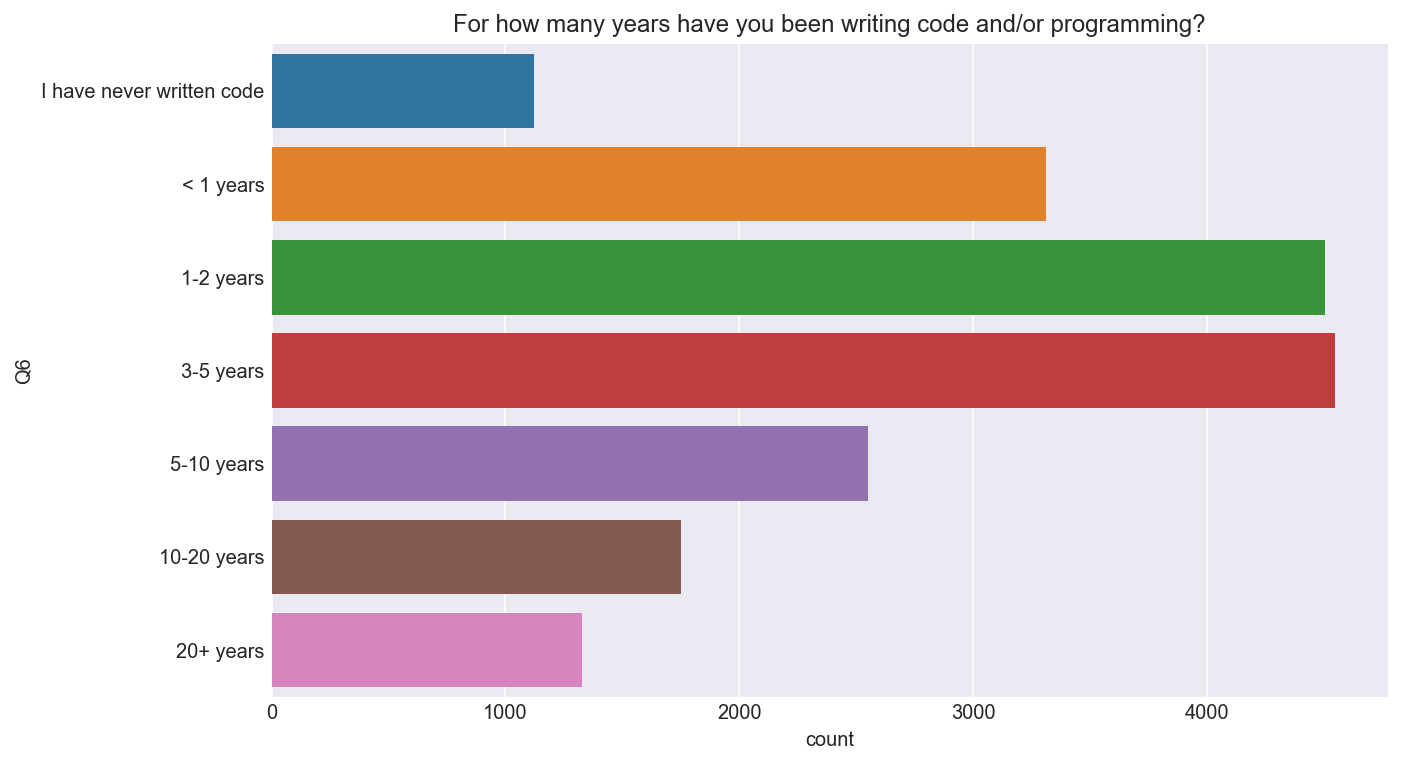

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer, 
              y=question_no,
              order=q6_cols
             ).set_title(question[question_no])

In [22]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


In [24]:
question.filter(regex="Q7", axis=0)[0]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

In [25]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


Text(0.5, 1.0, 'What programming languages do you use on a regular basis?')

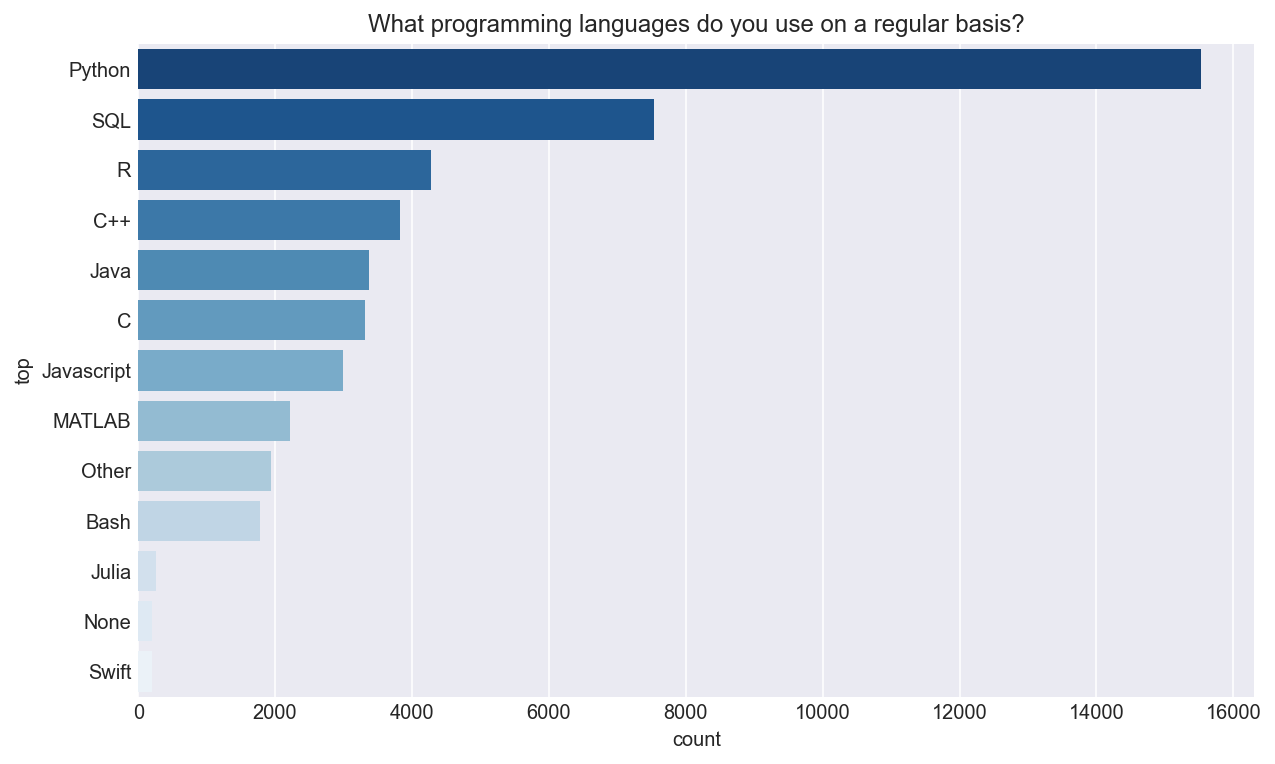

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index,
              x="count", palette="Blues_r"
             ).set_title("What programming languages do you use on a regular basis?")

In [27]:
question_no = "Q8"
question[question_no]

'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'

Text(0.5, 1.0, 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice')

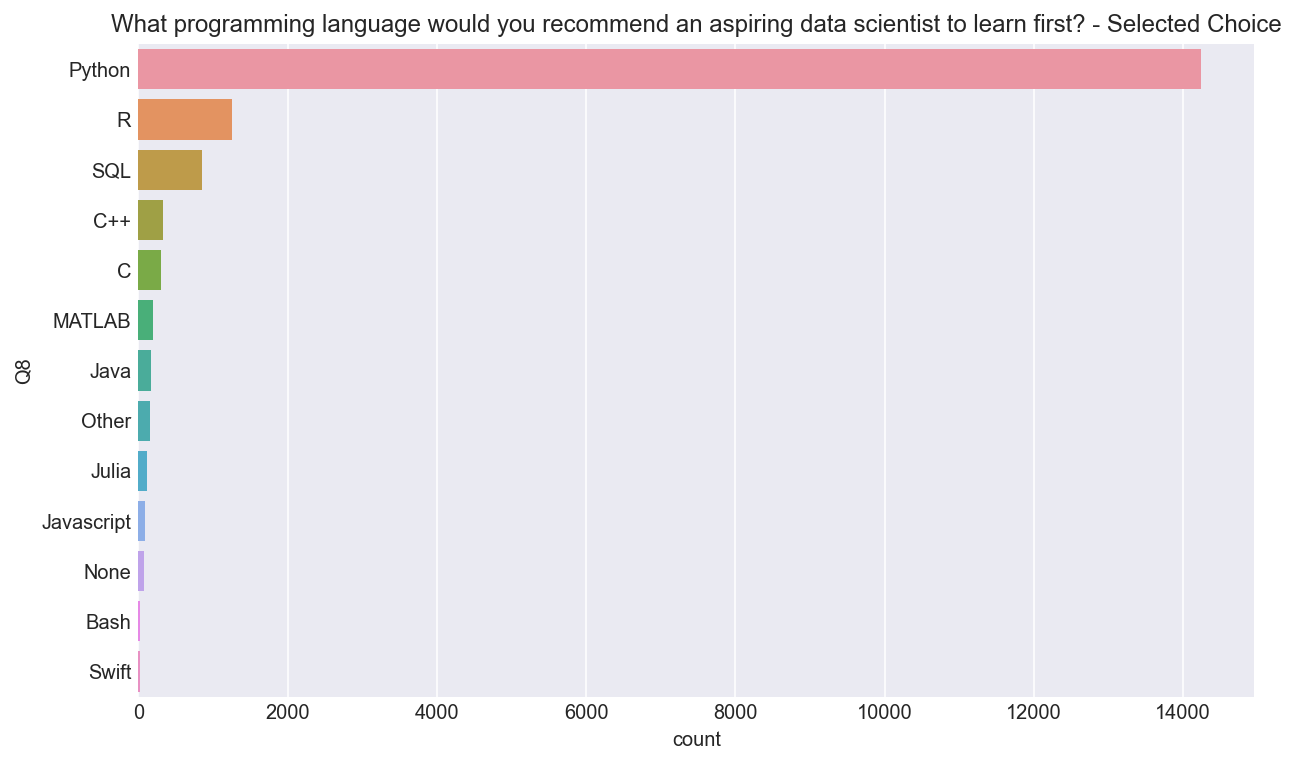

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer, 
              y=question_no,
              order=answer[question_no].value_counts().index
             ).set_title(question[question_no])

### get multiple choice answer

In [29]:
def get_multiple_choice_answer(question_no):    
    df_answer = answer.filter(regex=question_no)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
    answer_count = answer_count.sort_values("count", ascending=False)
    return answer_count

In [30]:
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [31]:
def get_question_title(question_no):
    if question_no in question.index:
        return question[question_no]
    else:
        q_no = answer.filter(regex=question_no).columns[0]
        q_no = question[q_no].split("-")[0]
        return q_no

In [32]:
question_title = get_question_title("Q7")
question_title

'What programming languages do you use on a regular basis? (Select all that apply) '

In [33]:
question_title = get_question_title("Q26")
question_title

'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) '

## 'Which of the following integrated development environments'

Text(0.5, 1.0, "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) ")

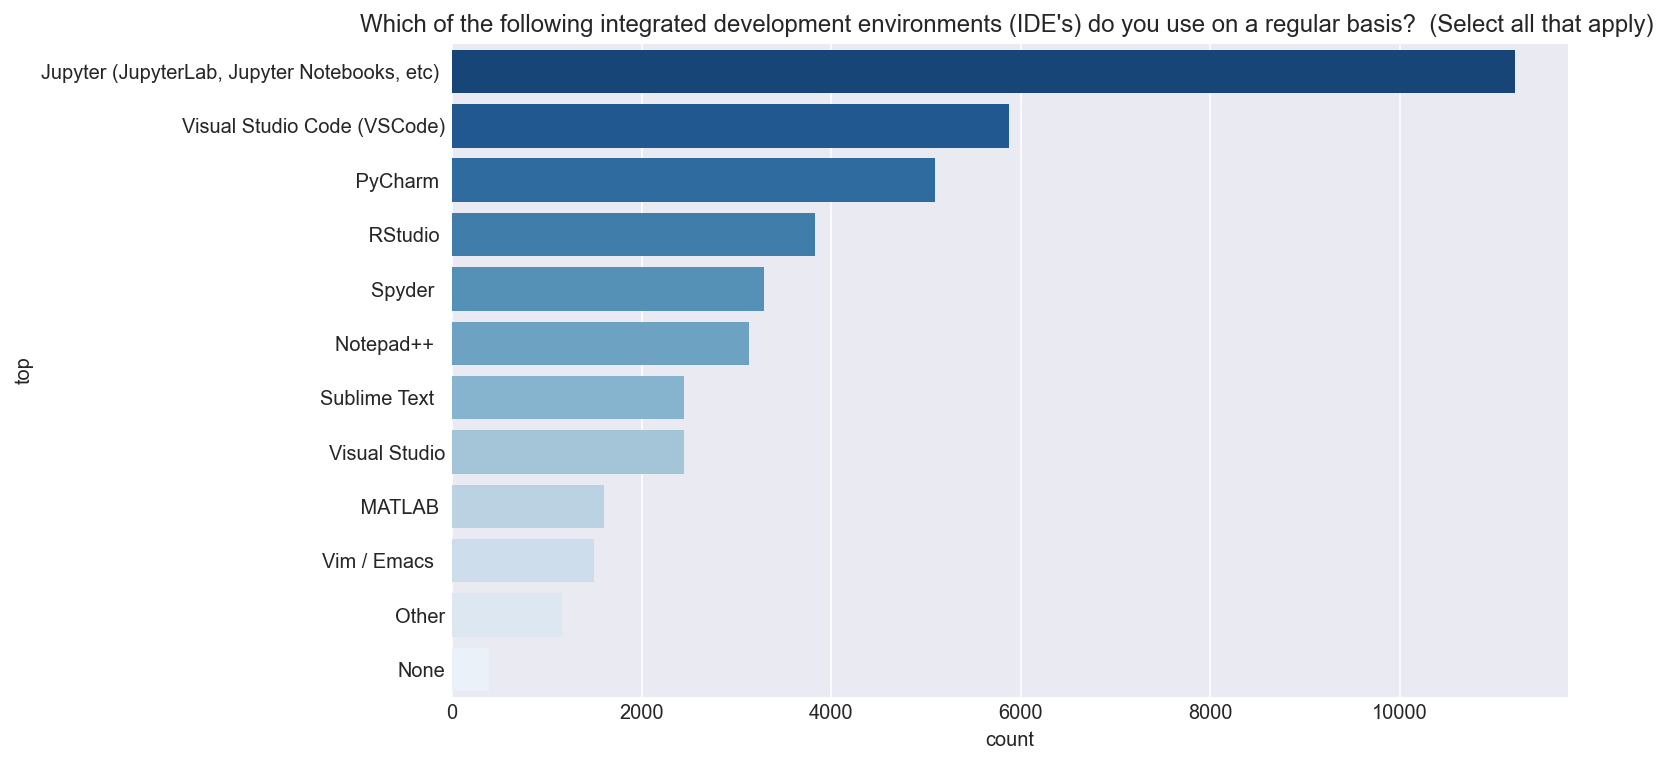

In [34]:
answer_Q9 = get_multiple_choice_answer("Q9")
question_title = get_question_title("Q9")

plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q9, y=answer_Q9.index,
              x="count", palette="Blues_r"
             ).set_title(question_title)

In [35]:
answer_Q10 = get_multiple_choice_answer("Q10")
answer_Q10

,count
top,
Colab Notebooks,6329
Kaggle Notebooks,5992
None,5282
Binder / JupyterHub,2072
Google Cloud Datalab Notebooks,1231
Google Cloud AI Platform Notebooks,1218
Azure Notebooks,857
IBM Watson Studio,846
Amazon Sagemaker Studio,497


Text(0.5, 1.0, 'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) ')

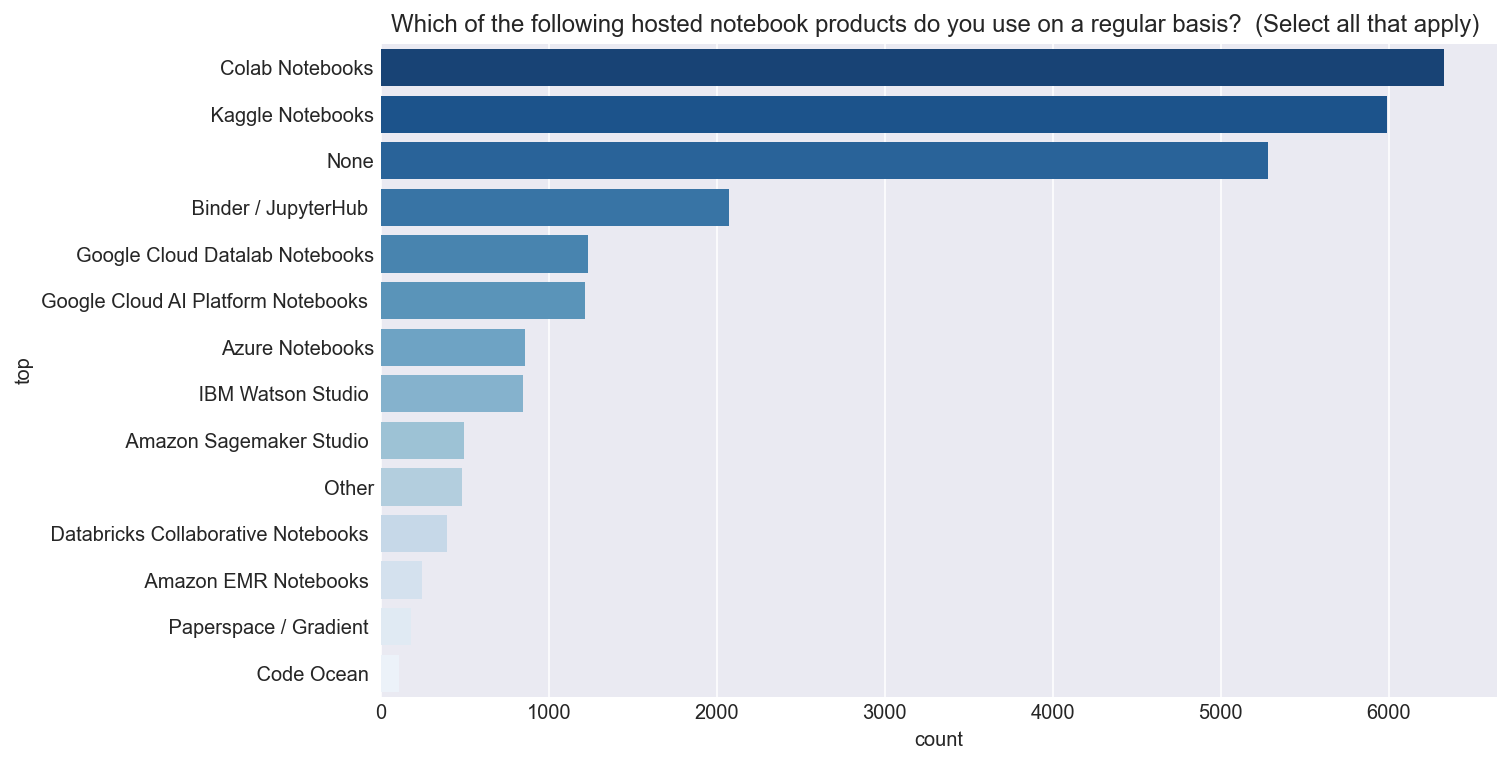

In [36]:
question_title = get_question_title("Q10")

plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q10, y=answer_Q10.index,
              x="count", palette="Blues_r"
             ).set_title(question_title)

In [37]:
question_no = "Q11"
question[question_no]

'What type of computing platform do you use most often for your data science projects? - Selected Choice'

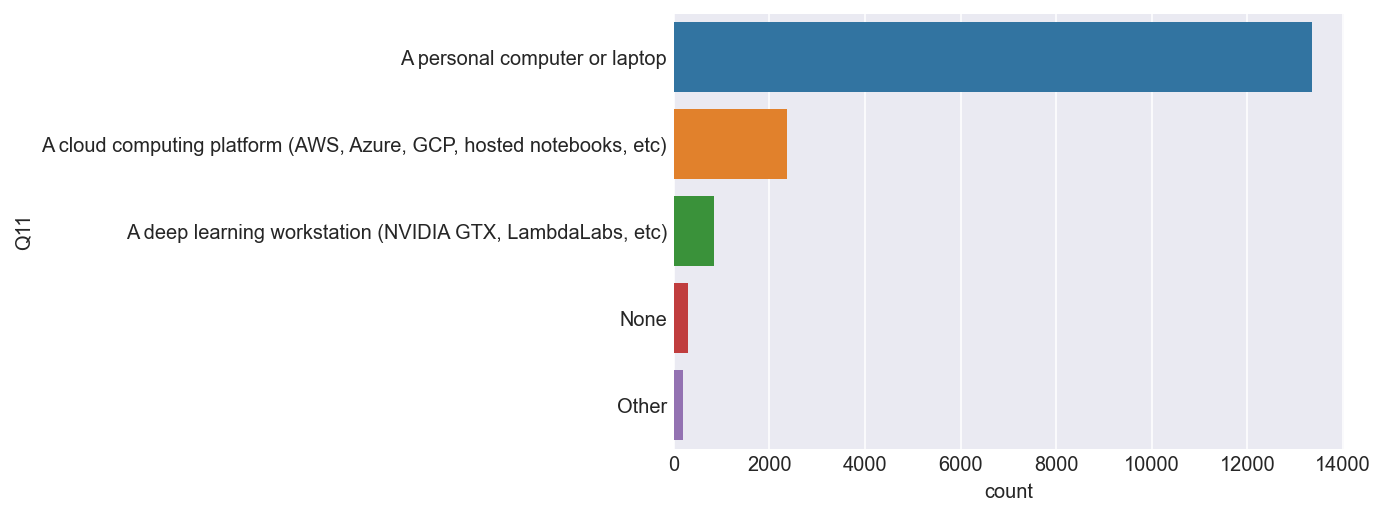

In [38]:
sns.countplot(data=answer, y="Q11", order=answer[question_no].value_counts().index)

In [39]:
answer_Q12 = get_multiple_choice_answer("Q12")
answer_Q12

,count
top,
GPUs,8310
None,7891
TPUs,960
Other,666


In [40]:
question_title = question["Q12_Part_1"].split("(")[0].strip()
question_title

'Which types of specialized hardware do you use on a regular basis?'

Text(0.5, 1.0, 'Which types of specialized hardware do you use on a regular basis?')

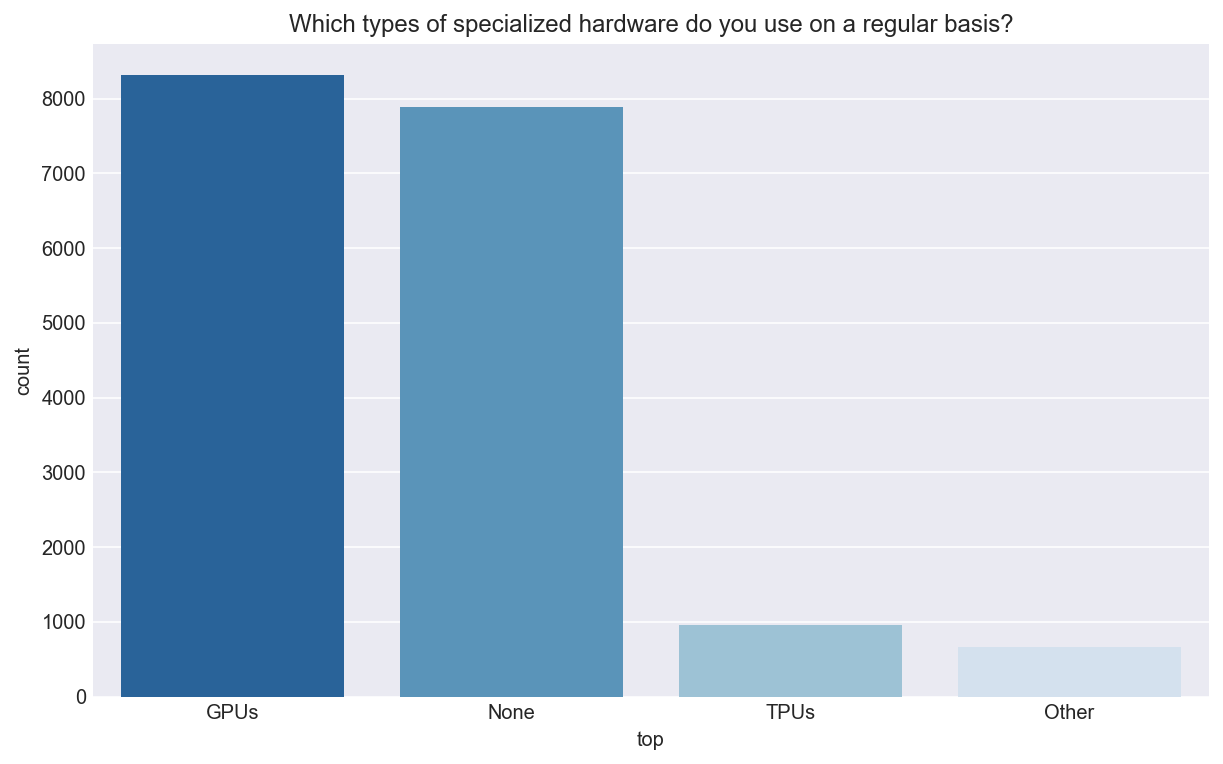

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q12, x=answer_Q12.index,
              y="count", palette="Blues_r"
             ).set_title(question_title)

In [42]:
question_no = "Q13"
question[question_no]

'Approximately how many times have you used a TPU (tensor processing unit)?'

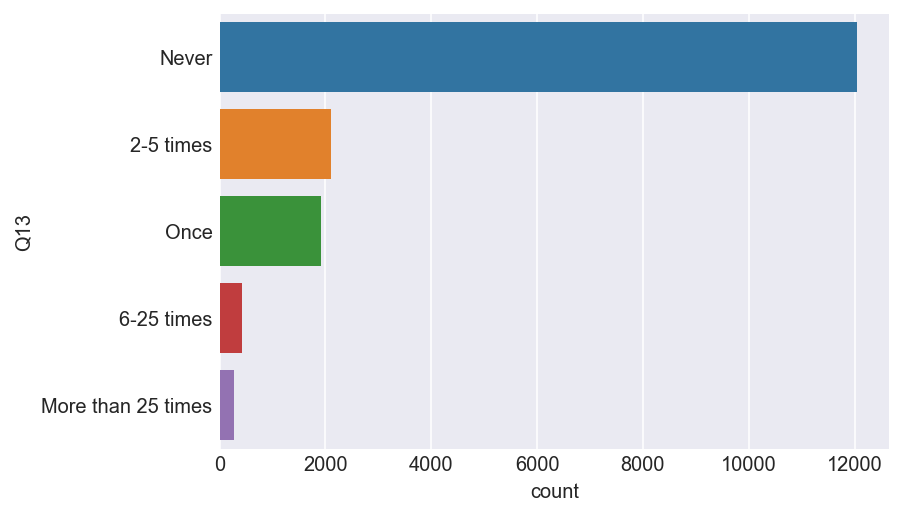

In [43]:
sns.countplot(data=answer, y="Q13", order=answer[question_no].value_counts().index)

In [44]:
answer_Q14 = get_multiple_choice_answer("Q14")
answer_Q14

,count
top,
Matplotlib,12342
Seaborn,8821
Plotly / Plotly Express,4130
Ggplot / ggplot2,4120
None,1897
Shiny,1137
Bokeh,920
Geoplotlib,850
D3 js,829


Text(0.5, 1.0, 'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) ')

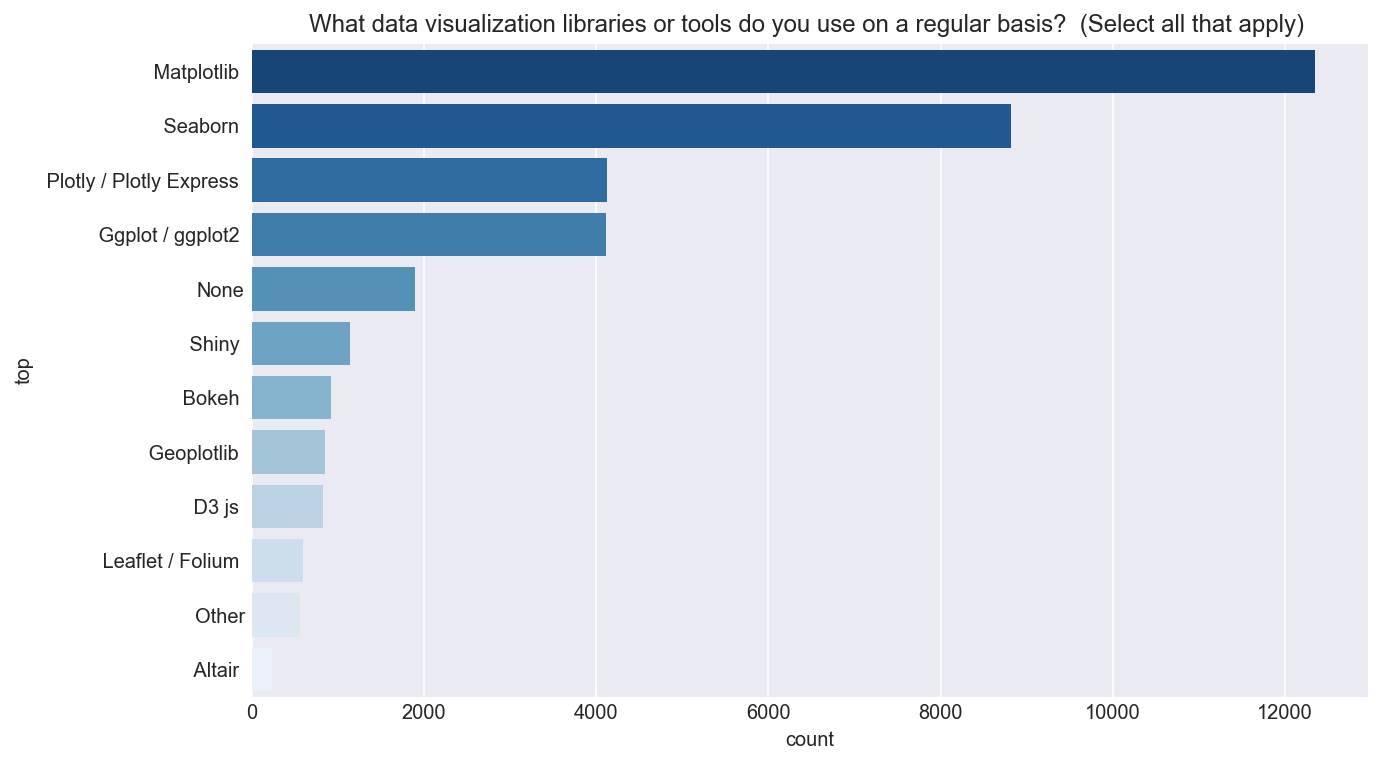

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q14, y=answer_Q14.index,
              x="count", palette="Blues_r"
             ).set_title(get_question_title("Q14"))

Text(0.5, 1.0, 'For how many years have you used machine learning methods?')

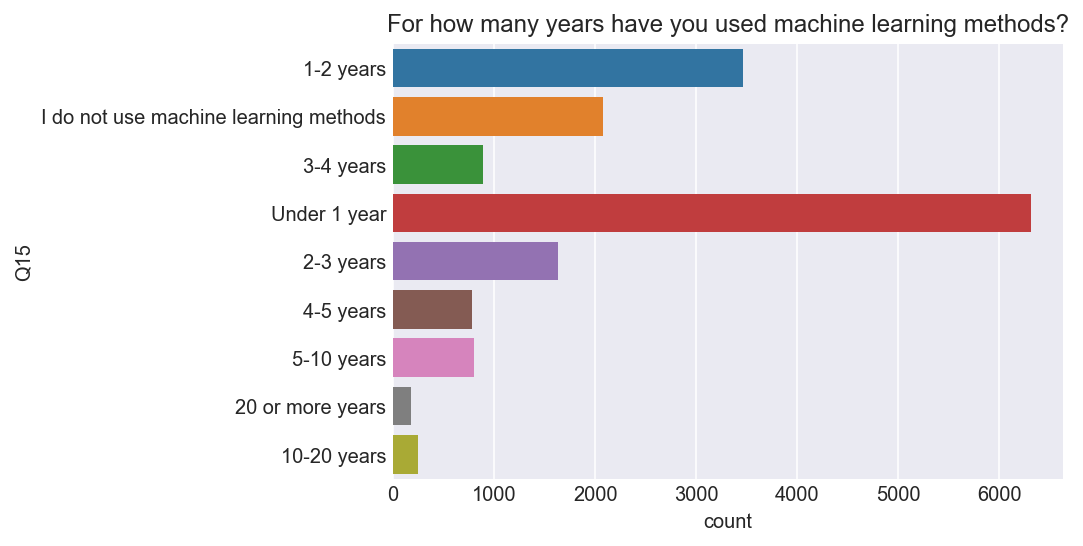

In [46]:
question_no = "Q15"
sns.countplot(data=answer, y="Q15").set_title(get_question_title(question_no))

In [47]:
question_no = "Q16"
get_question_title(question_no)

'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) '

In [48]:
answer_Q16 = get_multiple_choice_answer(question_no)
answer_Q16

,count
top,
Scikit-learn,10250
TensorFlow,6934
Keras,6192
PyTorch,4189
Xgboost,3935
LightGBM,1799
None,1208
CatBoost,957
Caret,939


In [49]:
def show_multiple_choice_plot(question_no):   
    multiple_choice_answer = get_multiple_choice_answer(question_no)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index,
                  x="count", palette="Blues_r"
                 ).set_title(get_question_title(question_no))

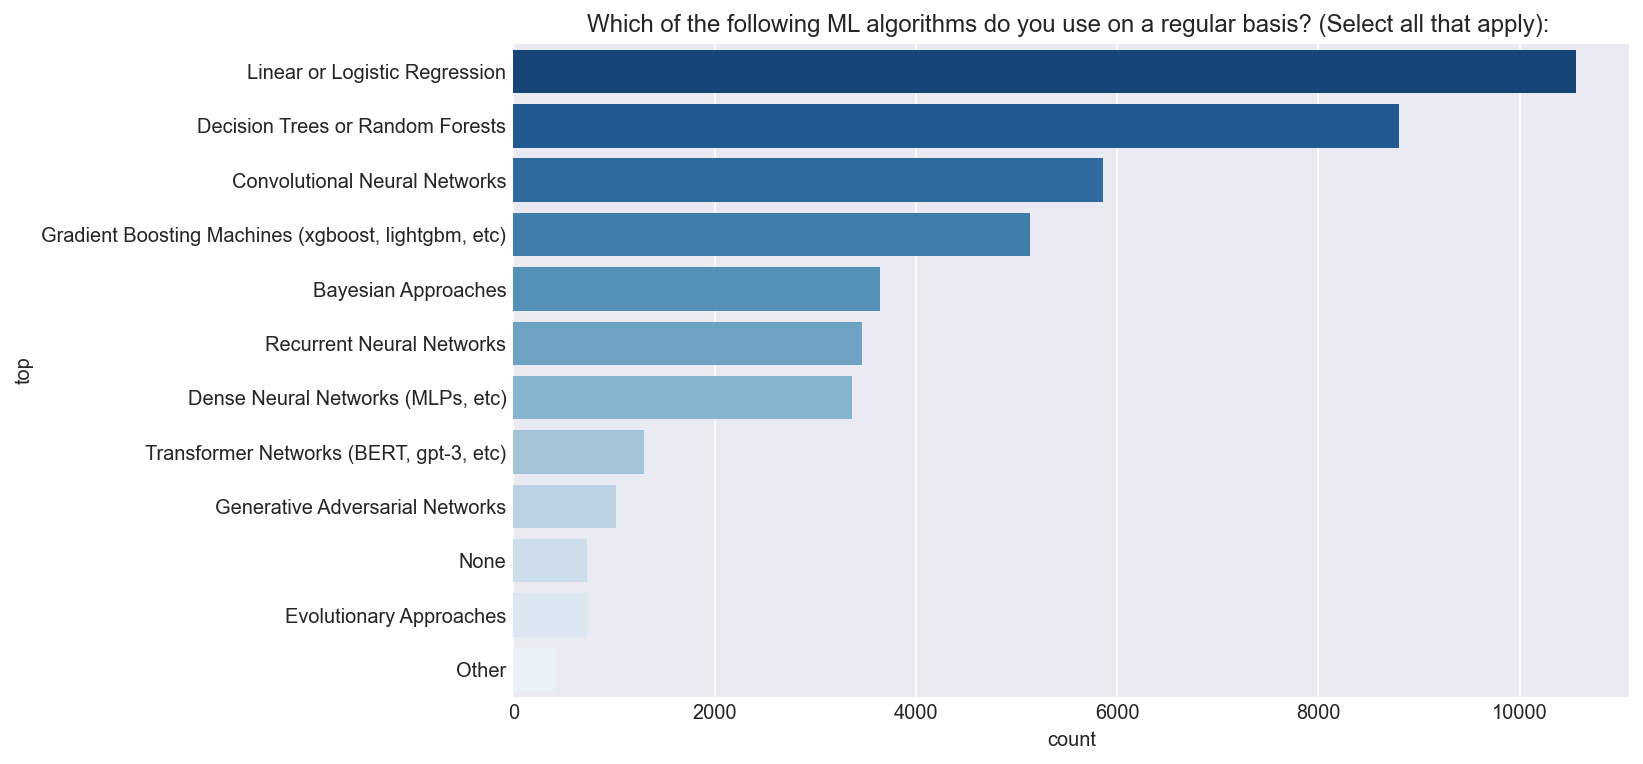

In [50]:
show_multiple_choice_plot("Q17")

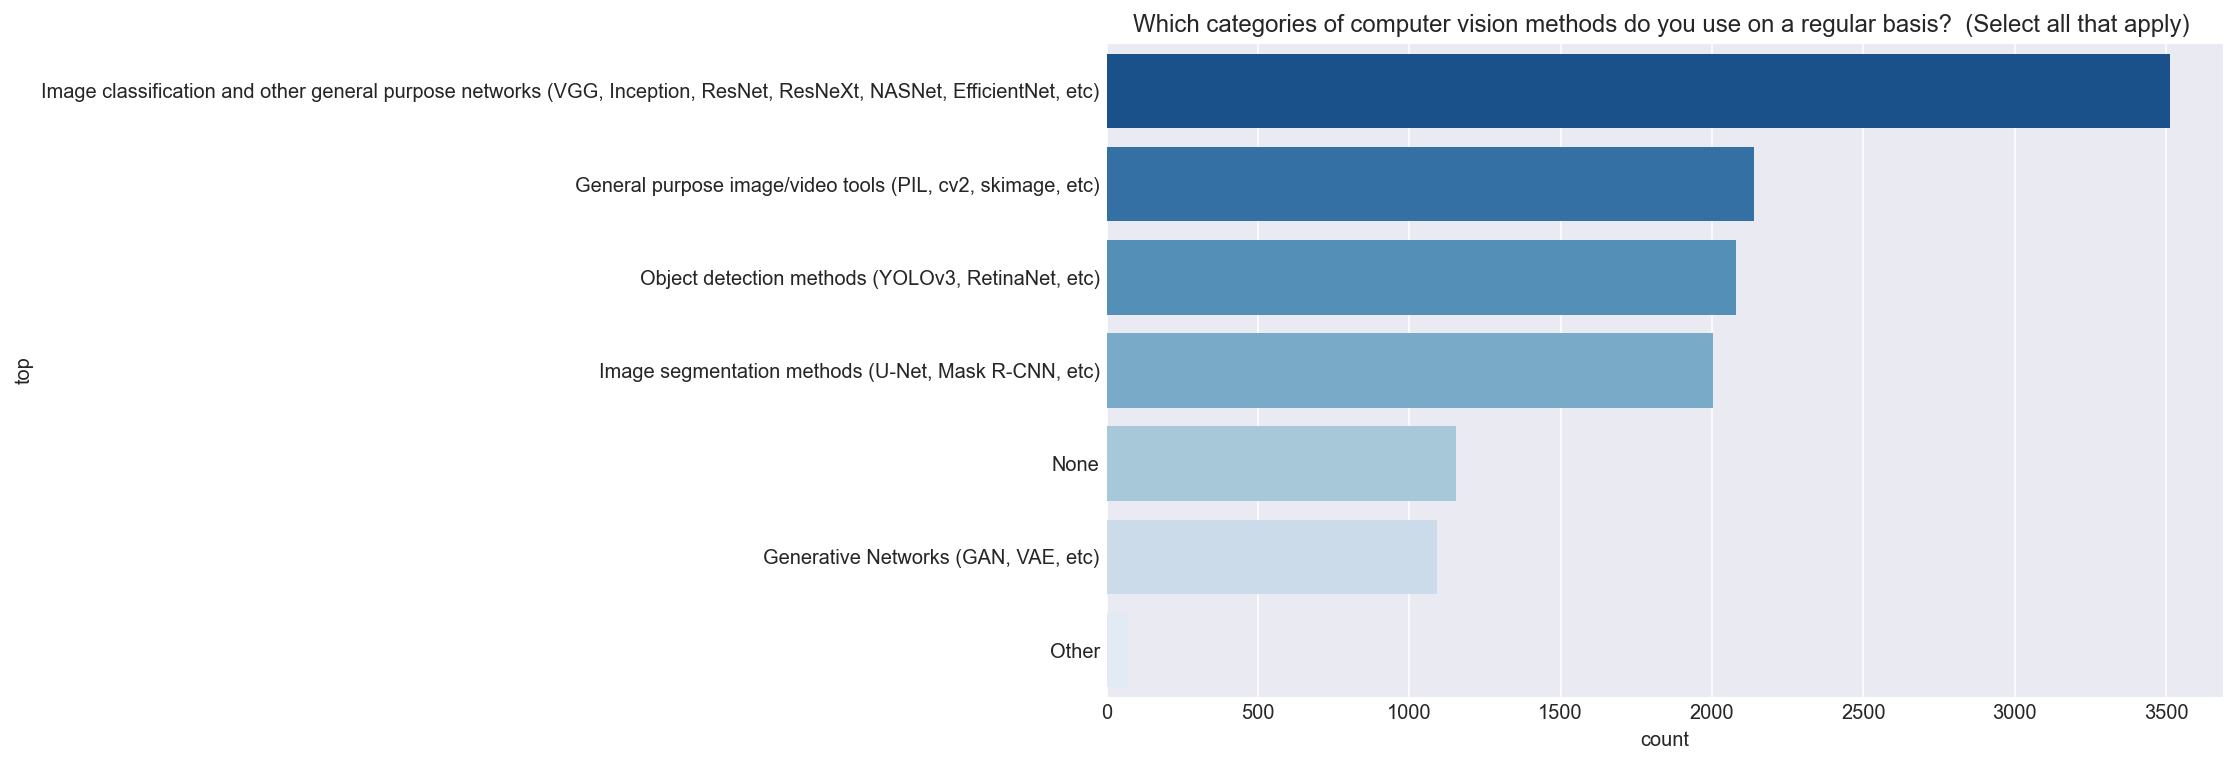

In [51]:
show_multiple_choice_plot("Q18")

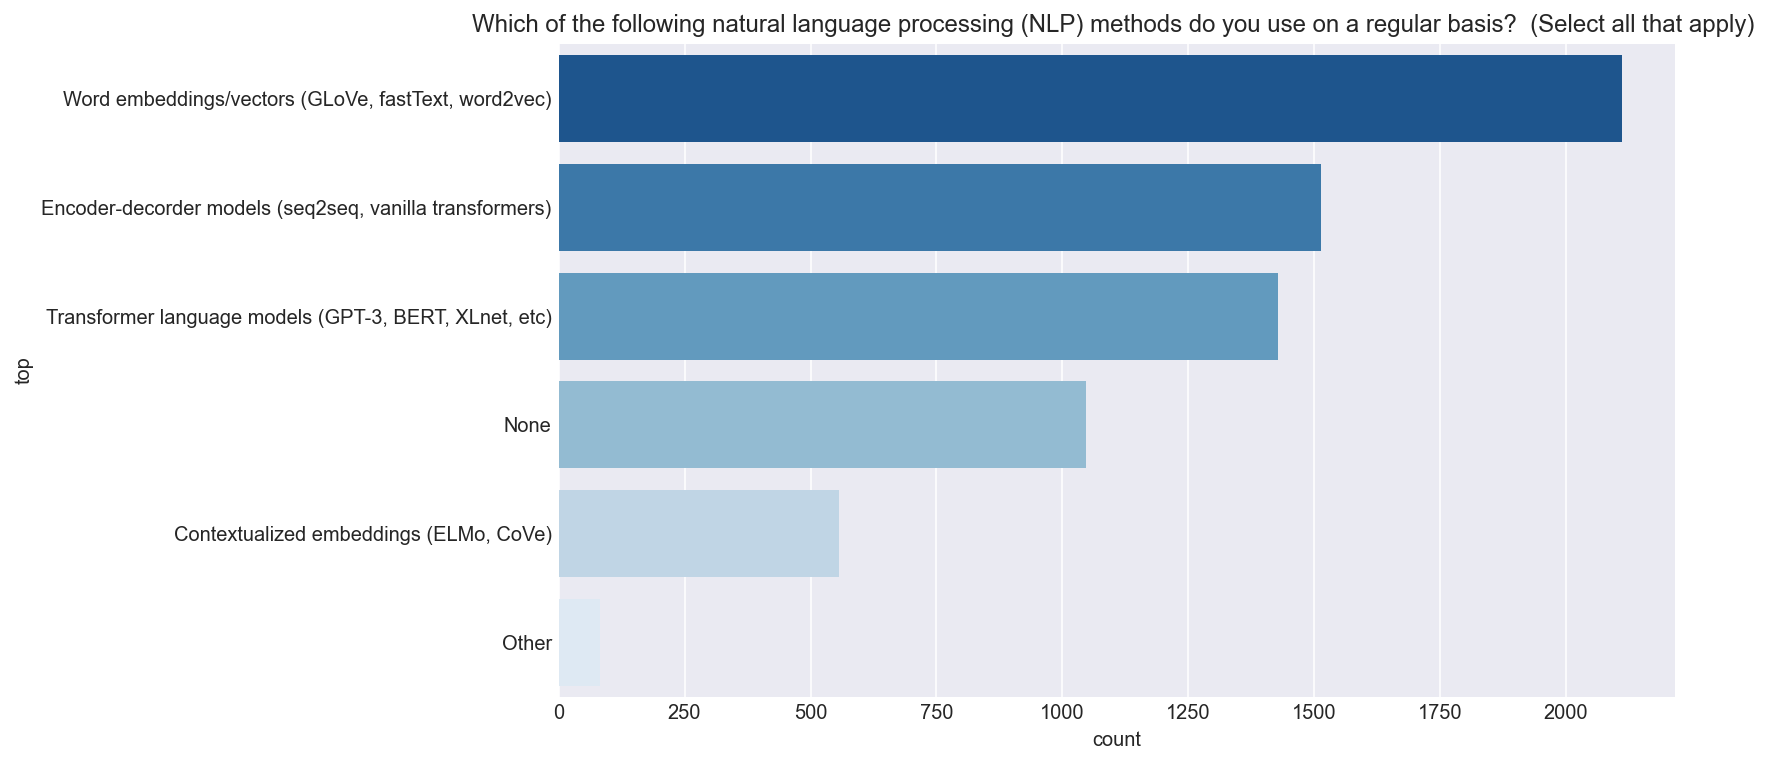

In [52]:
show_multiple_choice_plot("Q19")

Text(0.5, 1.0, 'What is the size of the company where you are employed?')

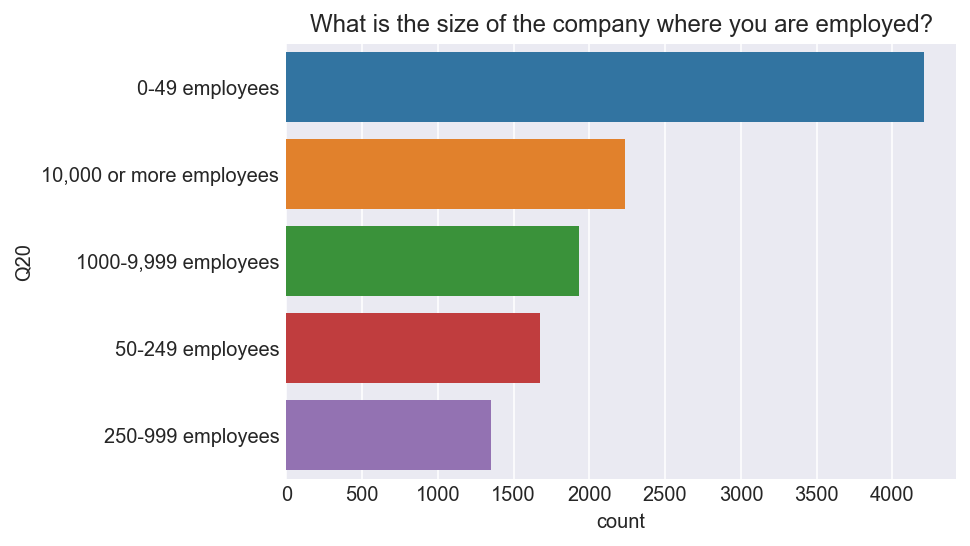

In [53]:
question_no = "Q20"
sns.countplot(data=answer, y=question_no, 
              order=answer[question_no].value_counts().index).set_title(get_question_title(question_no))

Text(0.5, 1.0, 'Approximately how many individuals are responsible for data science workloads at your place of business?')

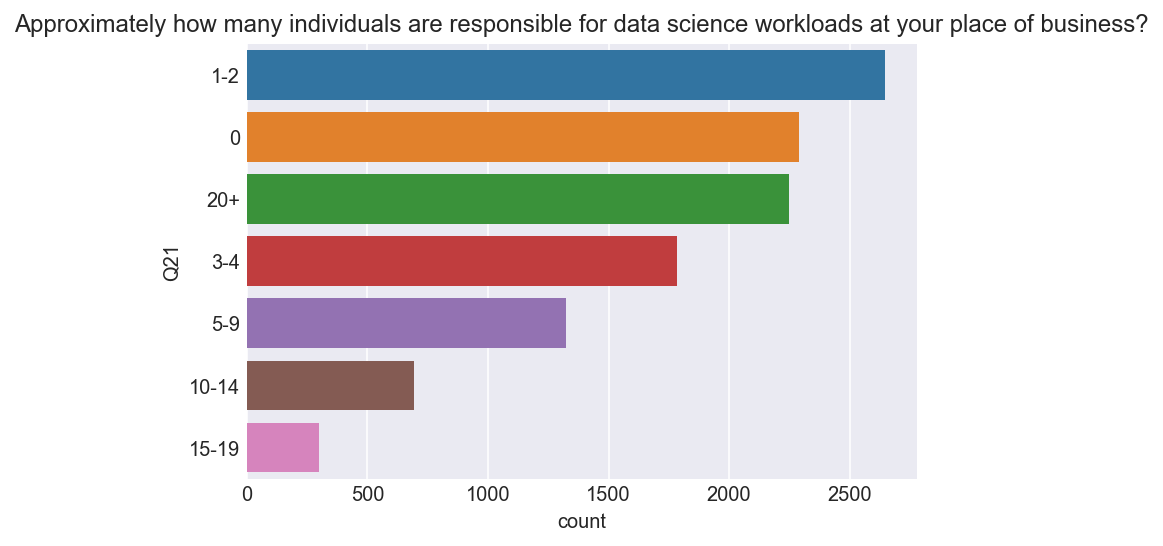

In [54]:
question_no = "Q21"
sns.countplot(data=answer, y=question_no, 
              order=answer[question_no].value_counts().index).set_title(get_question_title(question_no))

Text(0.5, 1.0, 'Does your current employer incorporate machine learning methods into their business?')

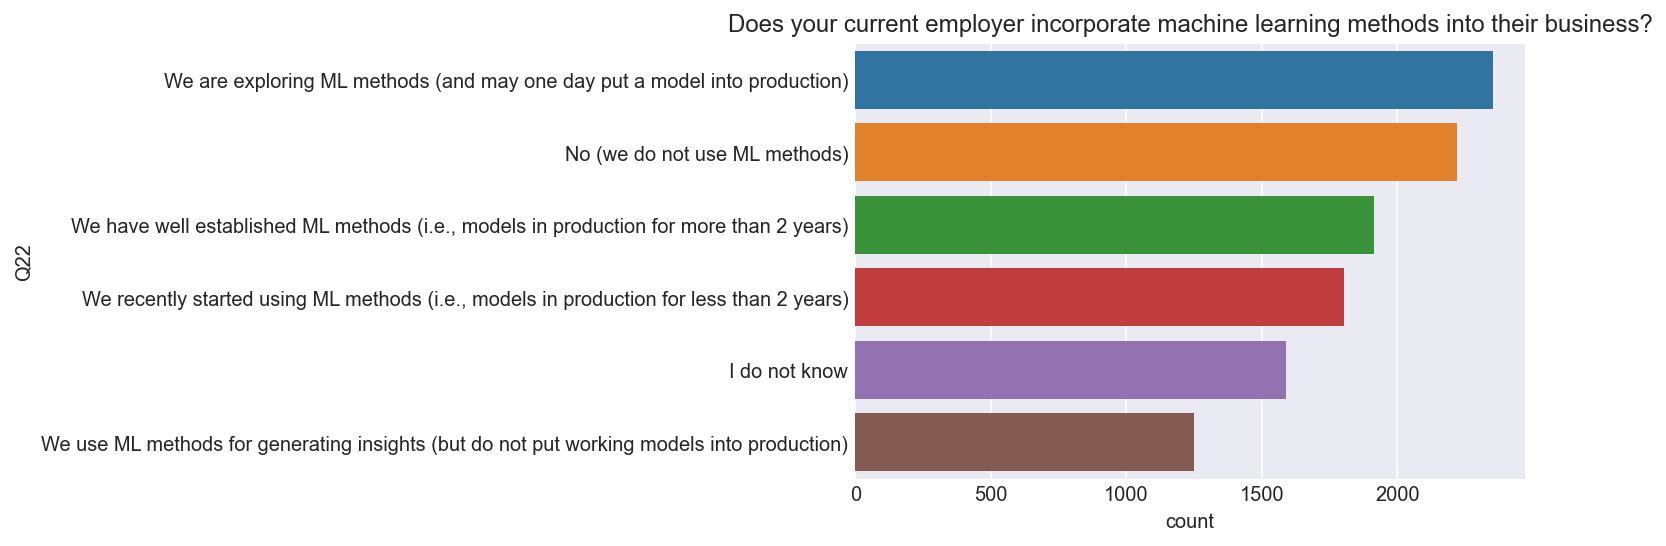

In [55]:
question_no = "Q22"
sns.countplot(data=answer, y=question_no, 
              order=answer[question_no].value_counts().index).set_title(get_question_title(question_no))

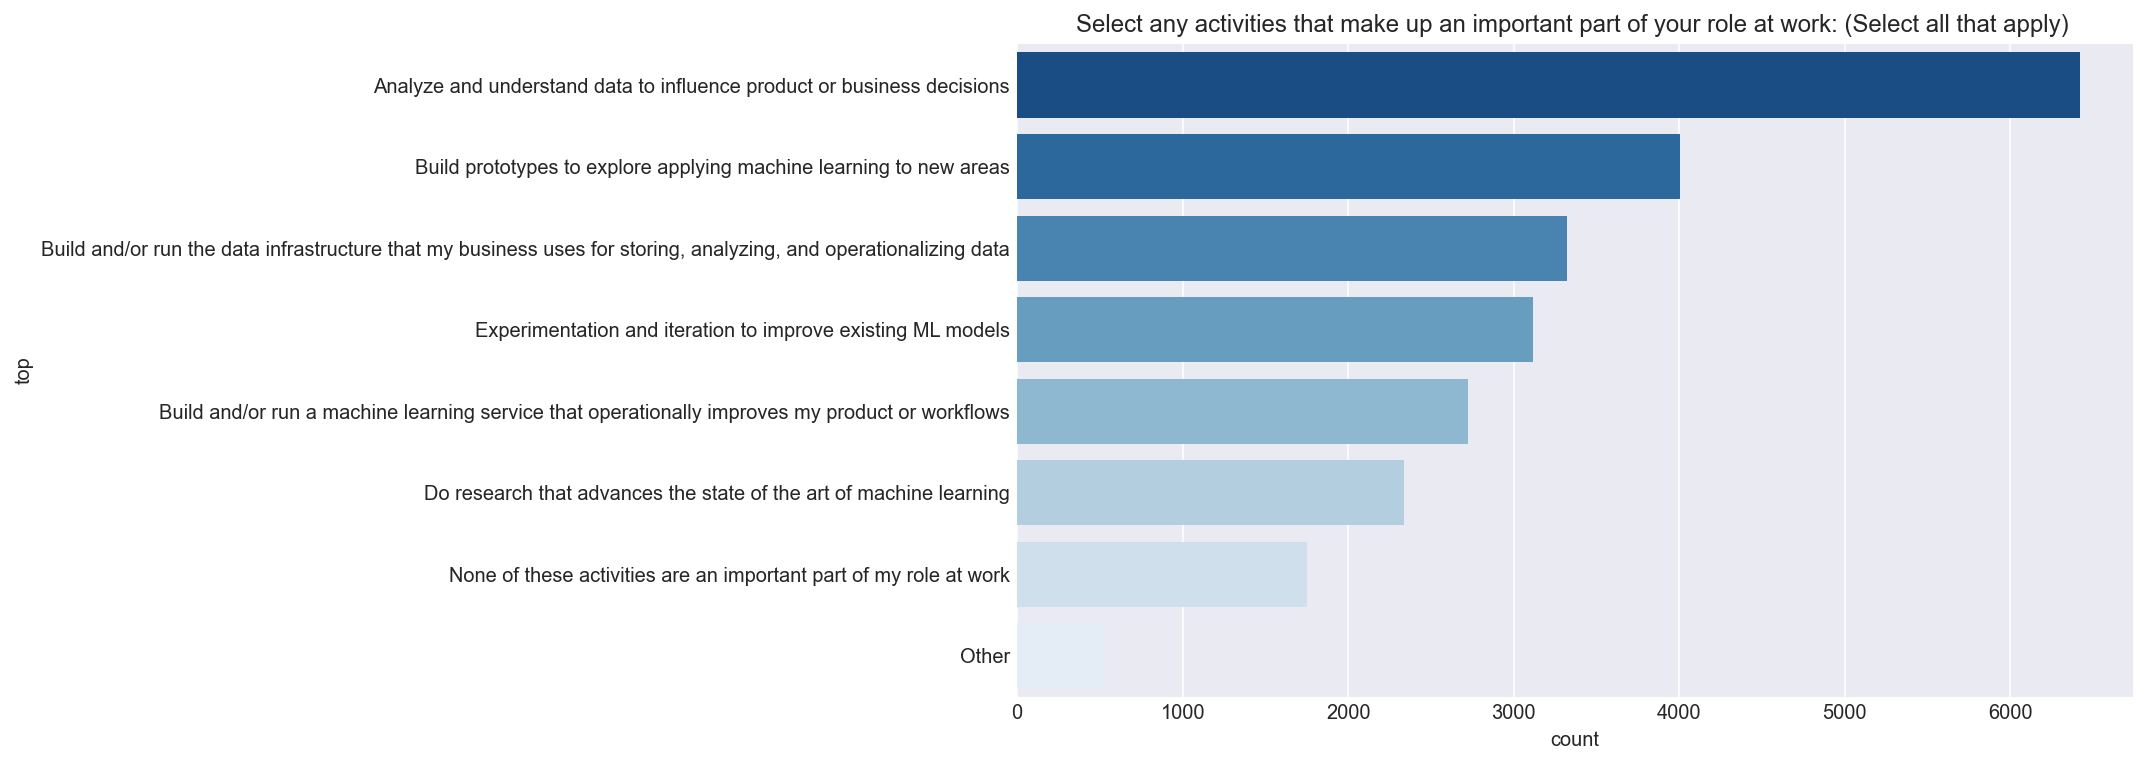

In [56]:
show_multiple_choice_plot("Q23")

## What is your current yearly compensation (approximate $USD)

Text(0.5, 1.0, 'What is your current yearly compensation (approximate $USD)?')

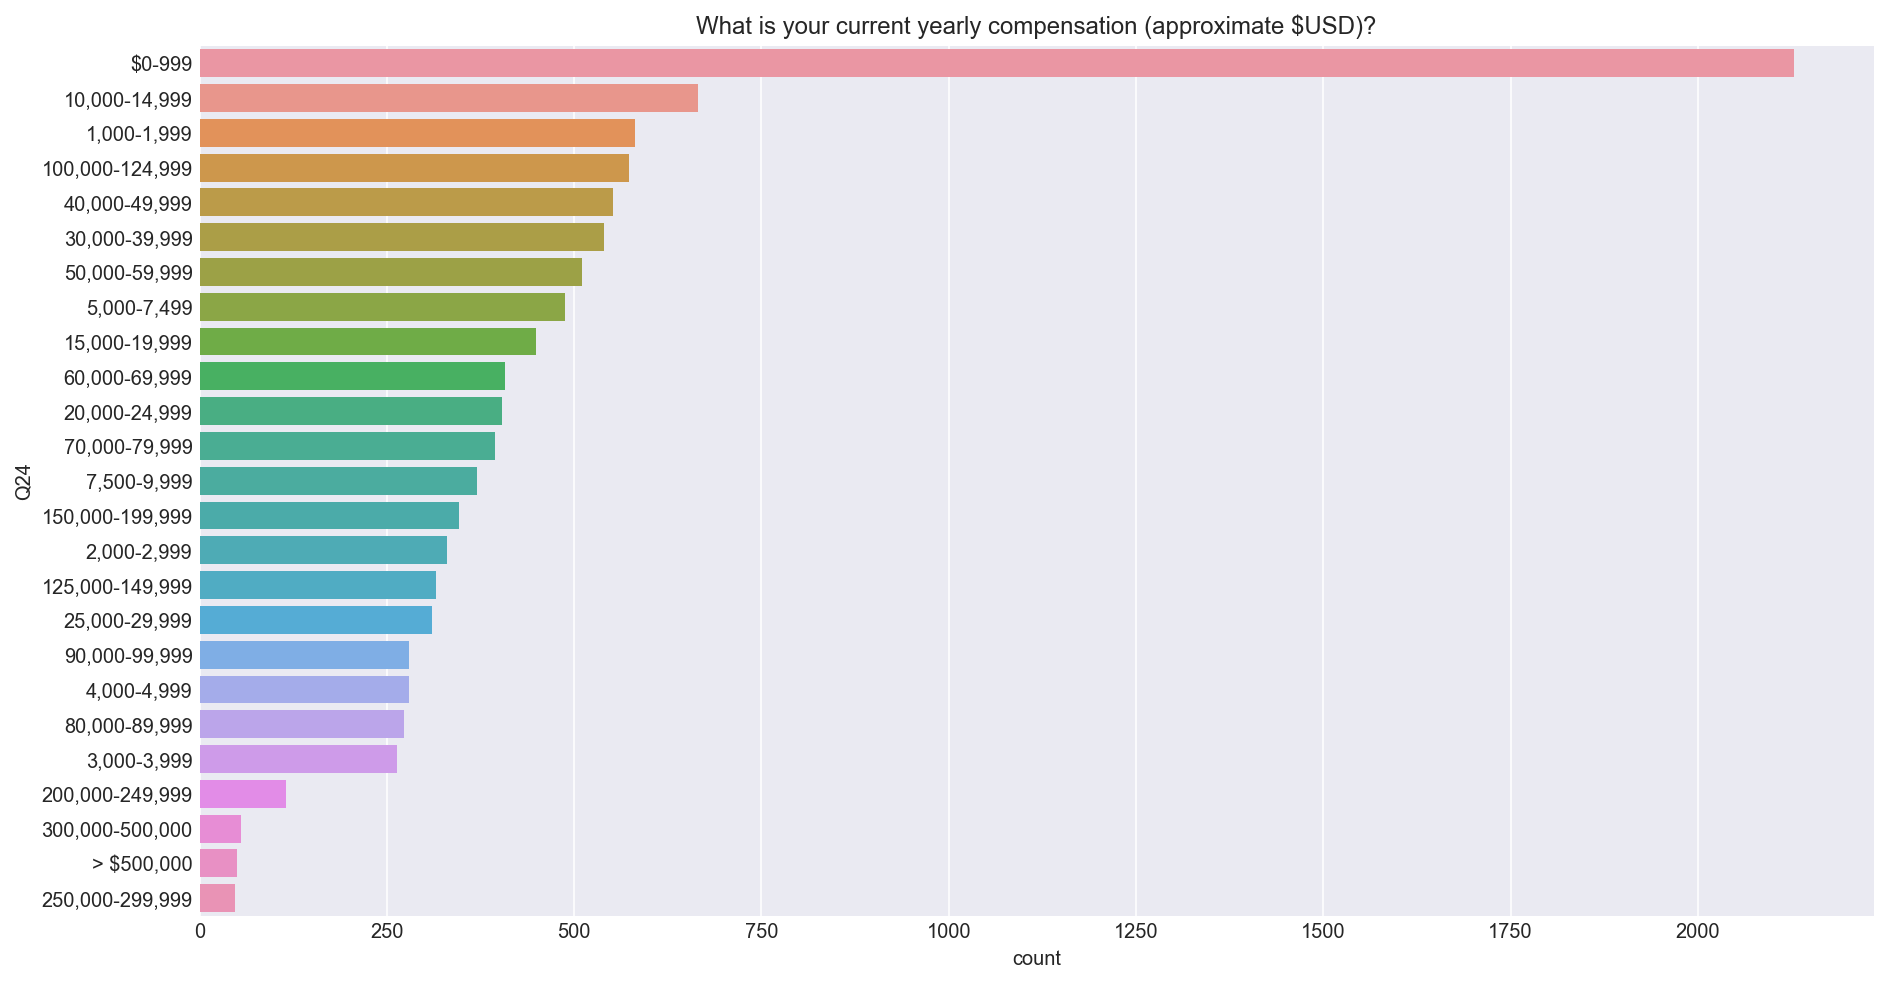

In [57]:
question_no = "Q24"
plt.figure(figsize=(15, 8))
sns.countplot(data=answer, y=question_no, 
              order=answer[question_no].value_counts().index).set_title(get_question_title(question_no))

## Q24 & Q3

In [58]:
q3_q24 = pd.crosstab(answer["Q3"], answer["Q24"])
q3_q24 = q3_q24.sort_values("90,000-99,999", ascending=False)
q3_q24

Q24,$0-999,"1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999","200,000-249,999",...,"4,000-4,999","40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999","> $500,000"
Q3,,,,,,,,,,,,,,,,,,,,,
United States of America,102,10,15,249,183,12,231,4,12,87,...,2,45,7,47,60,3,95,86,112,12
Germany,20,2,4,25,13,4,9,4,4,1,...,2,17,0,22,32,0,33,13,23,3
United Kingdom of Great Britain and Northern Ireland,23,2,4,30,16,2,26,1,9,6,...,0,38,1,36,42,1,28,10,21,5
Japan,59,10,8,24,13,1,3,4,4,0,...,14,36,27,42,34,13,31,15,17,0
Australia,15,3,0,20,14,1,7,1,3,3,...,1,11,1,8,11,0,13,11,17,1
Canada,18,0,3,23,14,2,5,2,1,1,...,1,17,5,18,16,0,20,23,15,1
India,681,140,242,33,12,137,12,71,111,5,...,124,64,216,55,26,147,25,16,15,7
Other,178,63,50,26,11,33,7,31,33,1,...,20,45,42,35,30,29,30,22,13,5
Israel,7,0,3,10,6,0,5,0,1,2,...,0,2,1,2,3,1,3,3,7,2


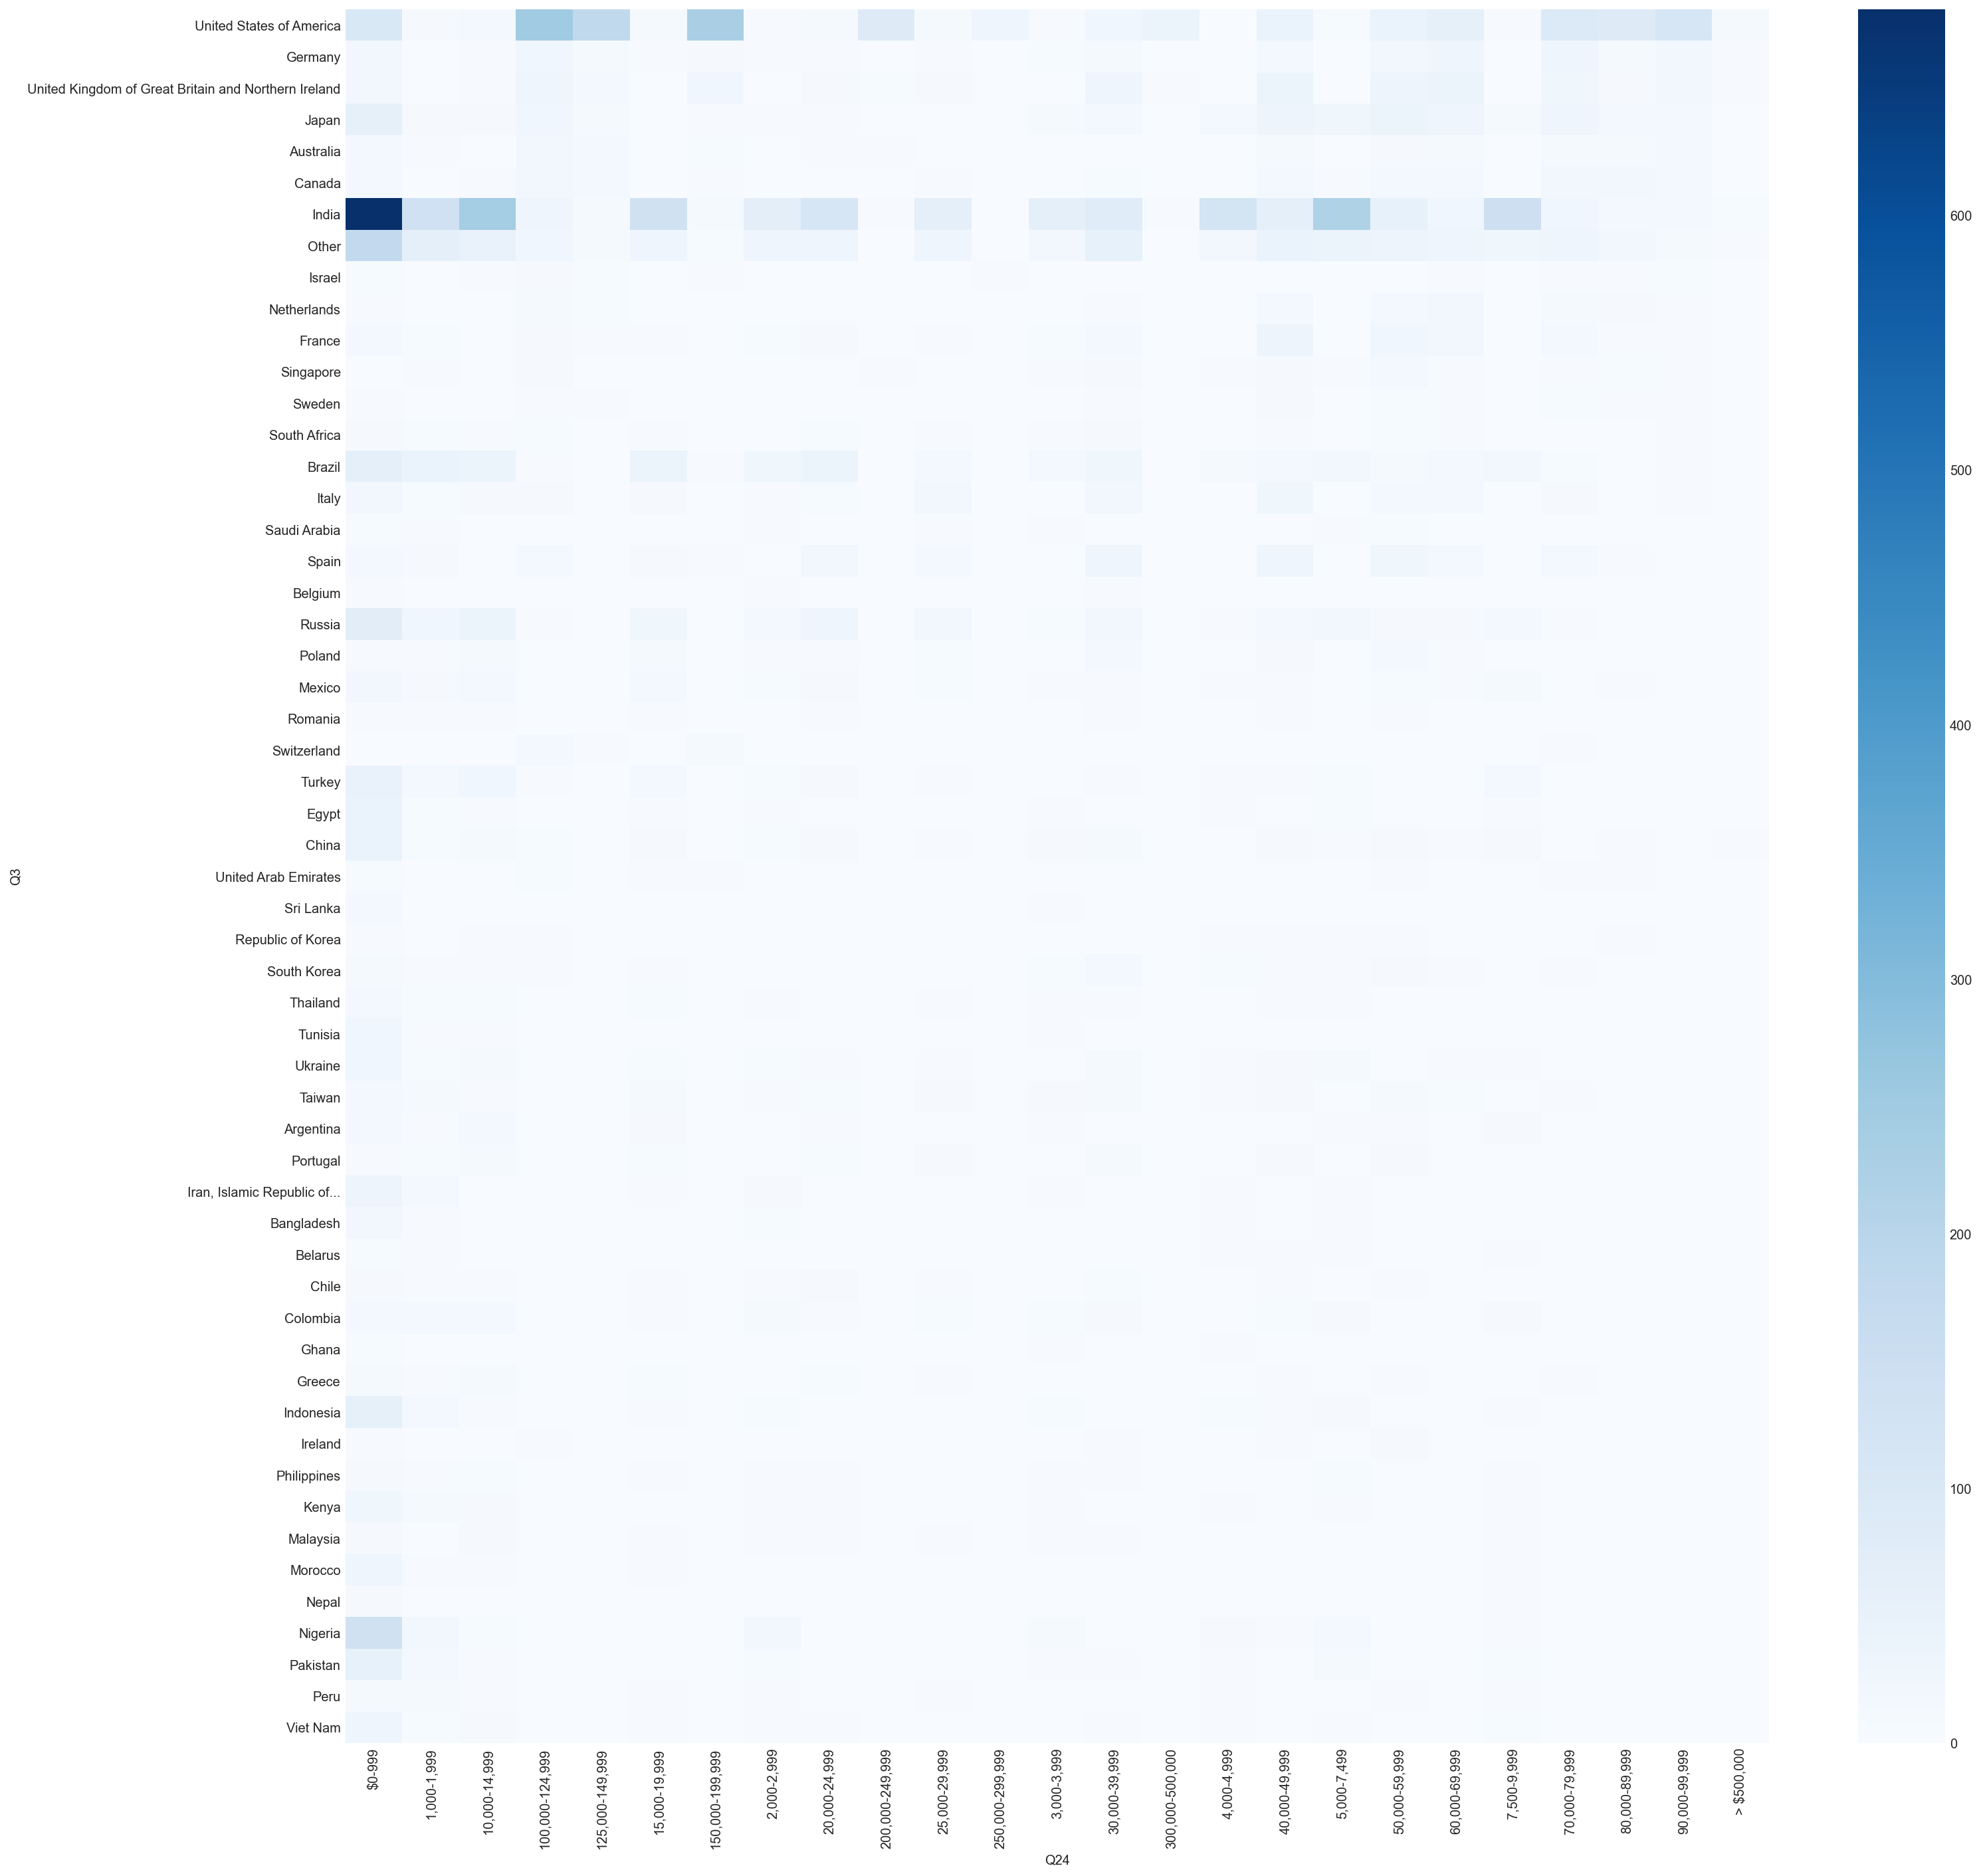

In [59]:
plt.figure(figsize=(24, 24))
sns.heatmap(q3_q24, cmap="Blues")

Text(0.5, 1.0, 'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?')

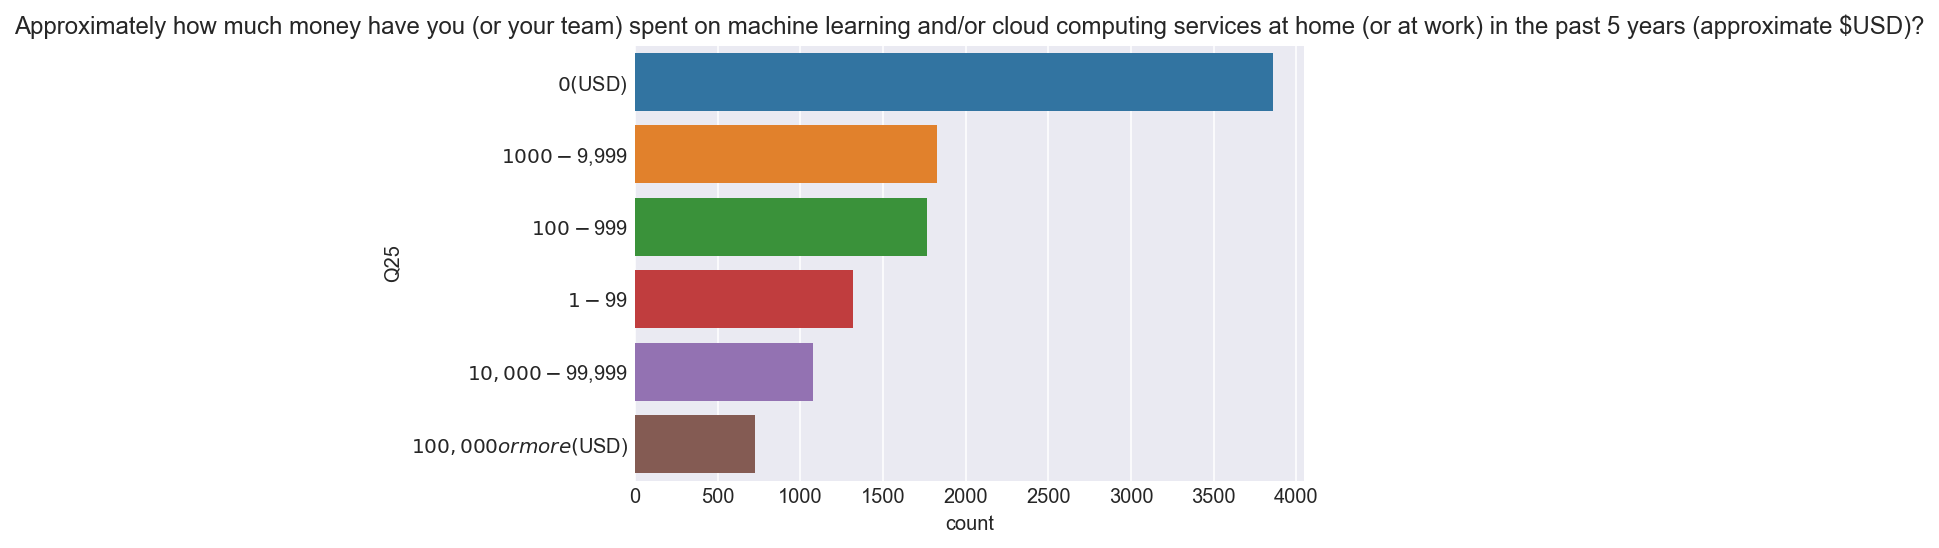

In [60]:
question_no = "Q25"
sns.countplot(data=answer, y=question_no, 
              order=answer[question_no].value_counts().index).set_title(get_question_title(question_no))

In [61]:
question_no = "Q26"
get_multiple_choice_answer(question_no)

,count
top,
Amazon Web Services (AWS),5236
Google Cloud Platform (GCP),5146
Microsoft Azure,3779
Amazon Web Services (AWS),2806
Google Cloud Platform (GCP),2286
None,1837
IBM Cloud / Red Hat,1746
Microsoft Azure,1705
None,1324


In [62]:
question_no = "Q26"
q26_count = get_multiple_choice_answer(question_no)
q26_count

,count
top,
Amazon Web Services (AWS),5236
Google Cloud Platform (GCP),5146
Microsoft Azure,3779
Amazon Web Services (AWS),2806
Google Cloud Platform (GCP),2286
None,1837
IBM Cloud / Red Hat,1746
Microsoft Azure,1705
None,1324


In [63]:
get_question_title(question_no)

'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) '

Text(0.5, 1.0, 'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) ')

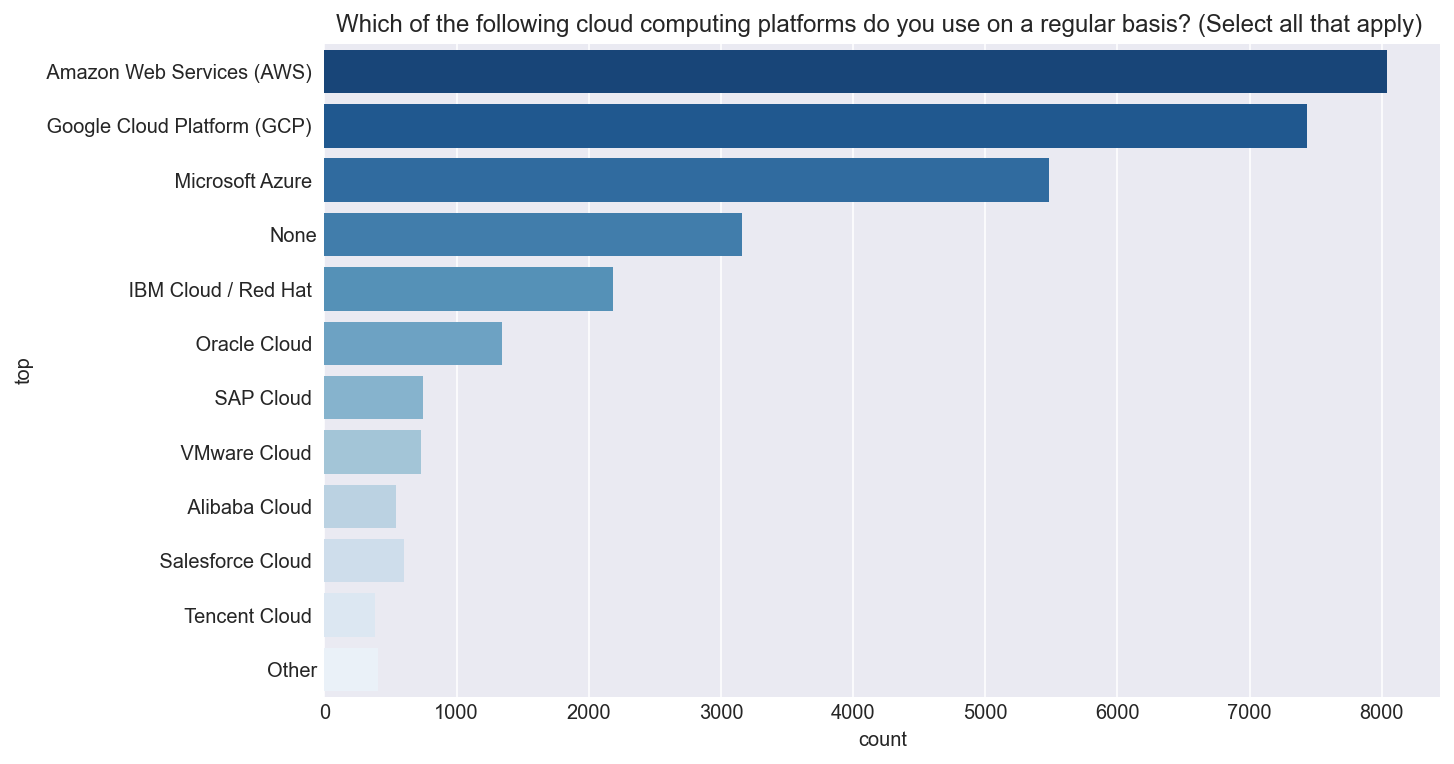

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=q26_count, y=q26_count.index,
              x="count", palette="Blues_r", estimator=np.sum, ci=None
             ).set_title(get_question_title(question_no))